In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans

In [ ]:
df_printing = pd.read_csv('Data_with_1_Printing_Gap.csv') # 1 printing gap dataset


In [ ]:
df_printing.head()

,ï»¿Index,Rwf,Order_Number,BCT1,BCT2,BCT3,BCT4,BCT5,BCT_Avg,BCT_Spec,...,New_Average_Printing_Gap,Number_of_use_Printing_Cylinder,GLWeigth(Grammage),BMWeigth(Grammage),BLWeigth(Grammage),CMWeigth(Grammage),CLWeigth(Grammage),Finished_Product_Wid,Finished_Product_Leg,Finished_Product_Hig
0,38,389,3909966101,249.629121,268.081436,246.241397,240.497465,255.865044,252.062893,226.80,...,0.835928,1,170,0,0,110,175,258,280,153
1,40,531,3909968101,139.483604,124.851641,130.440640,141.643842,130.396434,133.363232,99.93,...,0.068827,1,125,110,125,0,0,142,318,143
2,49,338,3910005801,305.155255,315.510925,318.240247,306.576357,300.970679,309.290693,211.80,...,0.005292,1,150,0,0,110,150,345,427,134
3,64,310,3910123201,207.743980,215.202219,192.547788,213.336514,198.122267,205.390554,110.60,...,0.119015,1,150,110,125,0,0,197,266,77
4,67,114,3910849901,280.141153,280.440520,233.864807,260.620519,284.648280,267.943056,211.80,...,0.266301,1,150,0,0,110,150,345,427,134


In [ ]:
df = df_printing
# Standardize the data
scaler = StandardScaler()
data = pd.DataFrame( scaler.fit_transform( df.iloc[:,3:] ) , columns=df.columns[3:])

In [ ]:
pca = PCA()
pc = pd.DataFrame(pca.fit_transform(data) )

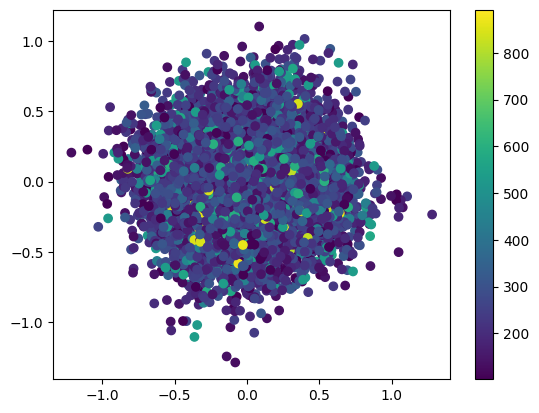

In [ ]:
plt.scatter(pc.iloc[:,15], pc.iloc[:,16], c=df['BCT_Avg'])
plt.colorbar()


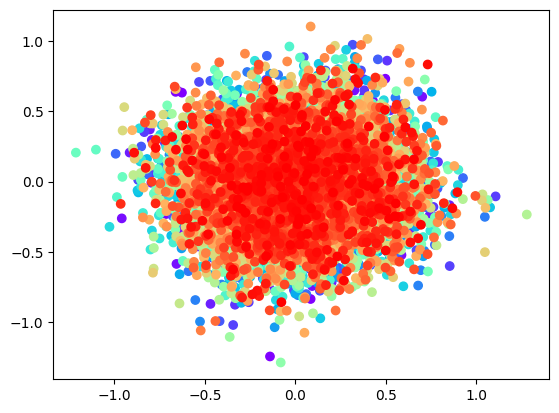

In [ ]:
plt.scatter(pc.iloc[:,15], pc.iloc[:,16], c=pd.factorize(df['BCT_Avg'])[0], cmap='rainbow')

Text(0, 0.5, 'New Printing Gap')

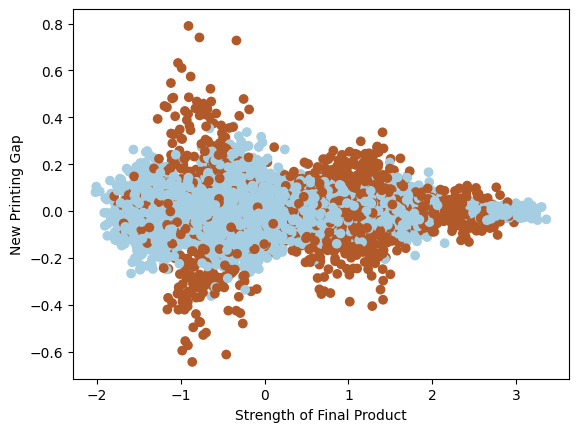

In [ ]:
# Apply K-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
## Plot the result
plt.scatter(pc.iloc[:,8], pc.iloc[:,22], c=kmeans.labels_, cmap='Paired')
plt.xlabel('Strength of Final Product')
plt.ylabel('New Printing Gap')

Kmeans is applied to generate two clusters.

Text(0, 0.5, 'Machine Speed')

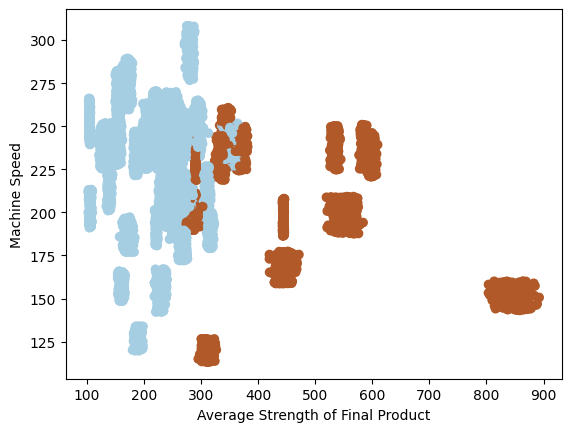

In [ ]:
plt.scatter(df['BCT_Avg'], df['Speed_Act'], c=kmeans.labels_, cmap='Paired')
plt.xlabel('Average Strength of Final Product')
plt.ylabel('Machine Speed')


Text(0, 0.5, 'Feed Roller Gap')

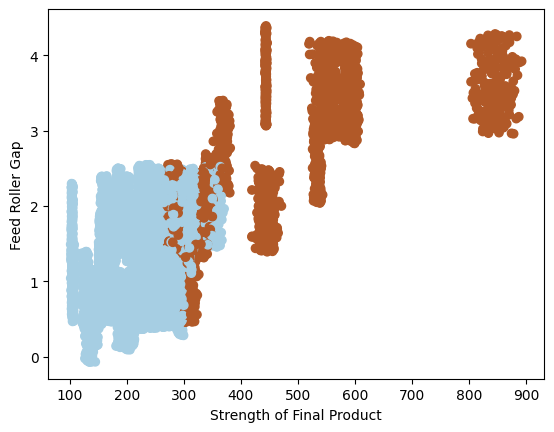

In [ ]:
plt.scatter(df['BCT_Avg'], df['Feed_Roll_Gap'], c=kmeans.labels_, cmap='Paired')
plt.xlabel('Strength of Final Product')
plt.ylabel('Feed Roller Gap')

Text(0, 0.5, 'Strength of Raw Material')

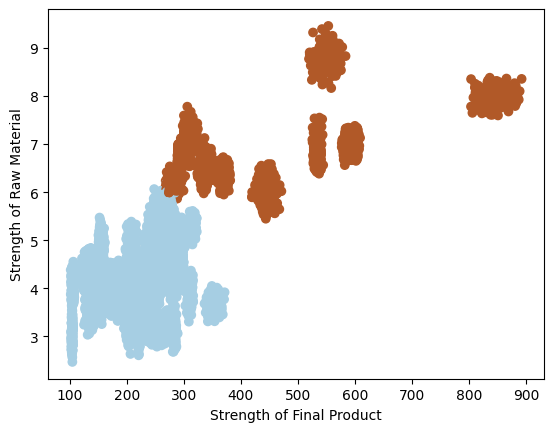

In [ ]:
plt.scatter(df['BCT_Avg'], df['ECT_Avg'], c=kmeans.labels_, cmap='Paired')

plt.xlabel('Strength of Final Product')
plt.ylabel('Strength of Raw Material')


Text(0, 0.5, 'Height of Finished Product')

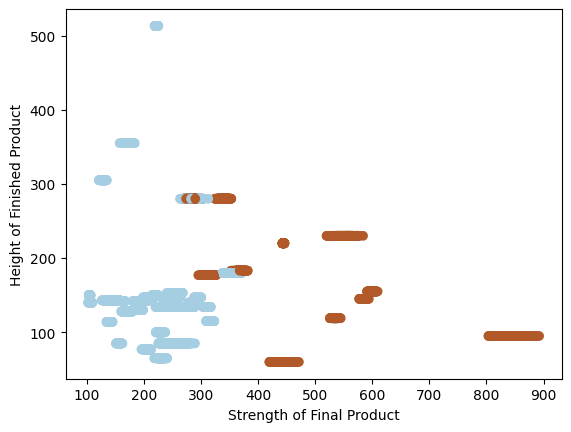

In [ ]:
plt.scatter(df['BCT_Avg'], df['Finished_Product_Hig'], c=kmeans.labels_, cmap='Paired')

plt.xlabel('Strength of Final Product')
plt.ylabel('Height of Finished Product')


Text(0, 0.5, 'New Printing Gap 1')

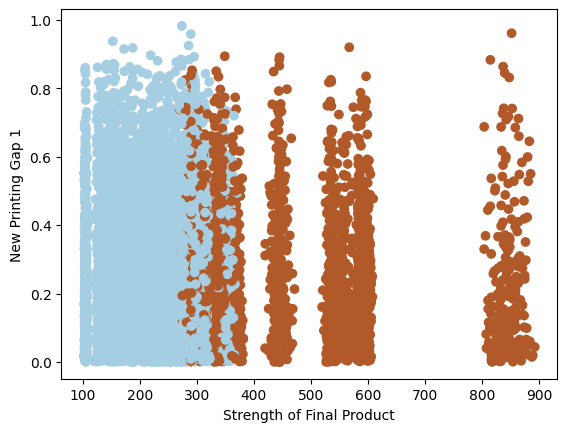

In [ ]:
plt.scatter(df['BCT_Avg'], df['New_Printing_Gap_1'], c=kmeans.labels_, cmap='Paired')

plt.xlabel('Strength of Final Product')
plt.ylabel('New Printing Gap 1')

Text(0, 0.5, 'New Printing Gap Average')

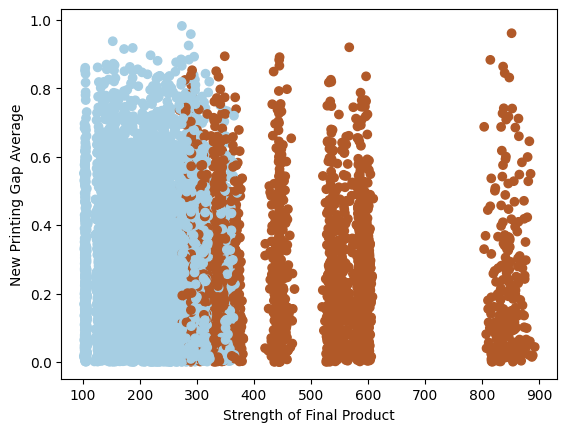

In [ ]:
plt.scatter(df['BCT_Avg'], df['New_Average_Printing_Gap'], c=kmeans.labels_, cmap='Paired')

plt.xlabel('Strength of Final Product')
plt.ylabel('New Printing Gap Average')

Text(0, 0.5, 'Silhouette score')

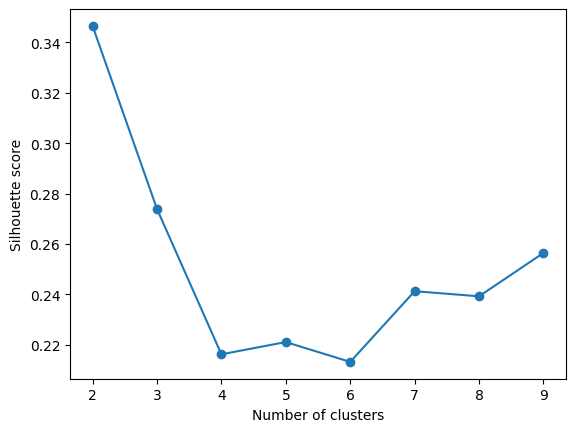

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    silhouette_scores.append( silhouette_score(data, kmeans.labels_) )

plt.plot(range(2,10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')



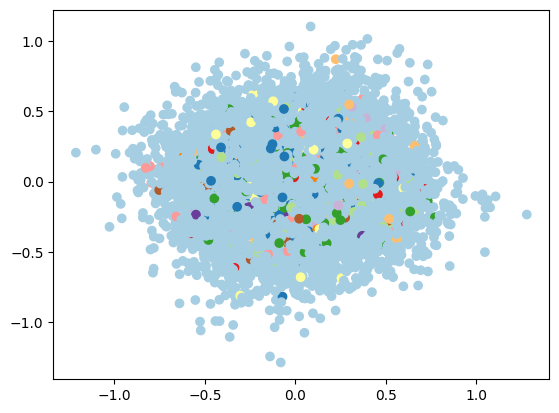

In [ ]:
# Clustering using DBSCAN algorithm. Distance between points is set to 1.0 esp
# and minimum samples is set to 8. This yields the output below.
dbscan = DBSCAN(eps=1.0, min_samples=8).fit(data)

plt.scatter(pc.iloc[:,15], pc.iloc[:,16], c=dbscan.labels_, cmap='Paired')

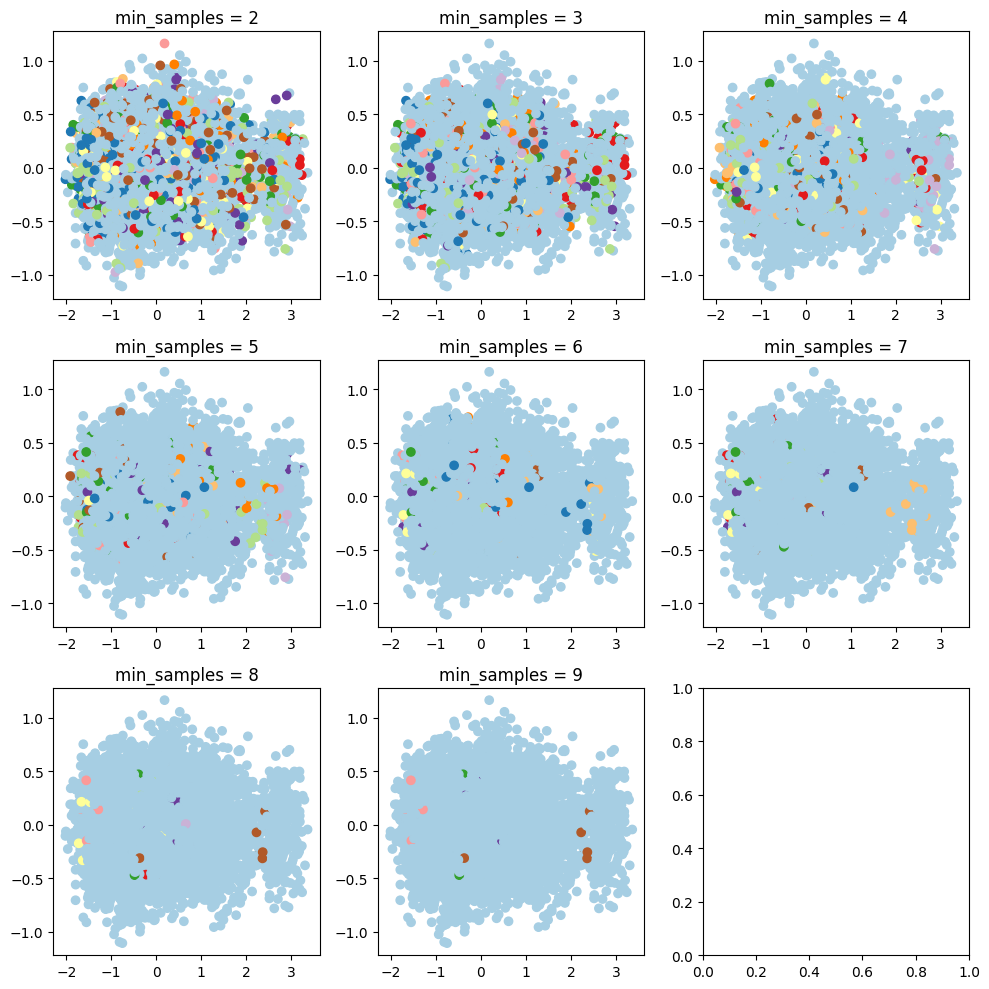

In [ ]:
# Clustering results of DBSCAN algorithm indicates center objects will decrease as samples size increases.
min_samples = range(2,10)
fig, axes = plt.subplots(3,3, figsize=(10,10))
for i, min_sample in enumerate(min_samples):
    dbscan = DBSCAN(eps=0.89, min_samples=min_sample).fit(data)
    axes[i//3, i%3].scatter(pc.iloc[:,8], pc.iloc[:,17], c=dbscan.labels_, cmap='Paired') # Parameters are BCT_Avg and Speed_Act
    axes[i//3, i%3].set_title('min_samples = {}'.format(min_sample))
plt.tight_layout()


In [ ]:
# Apply clustering methods - BIRCH, agglomerative clustering, OPTICS

Text(0, 0.5, 'New Average Printing Gap')

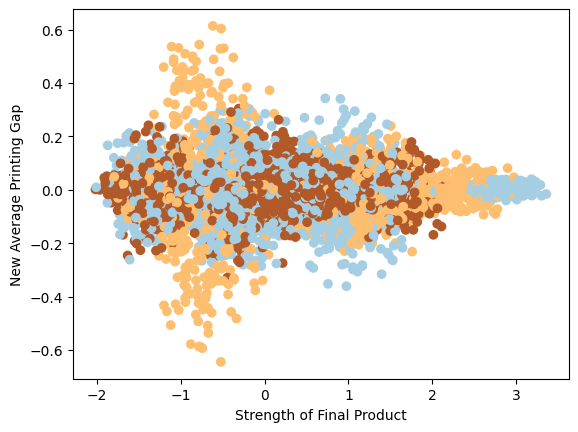

In [ ]:
# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering # import the AgglomerativeClustering class
Cluster = AgglomerativeClustering(n_clusters=3).fit(data) # apply the clustering algorithm
## Plot the result
plt.scatter(pc.iloc[:,8], pc.iloc[:,23], c=Cluster.labels_, cmap='Paired') # Parameters used are BCT_Avg and New_Average_Printing_Gap
plt.xlabel('Strength of Final Product')
plt.ylabel('New Average Printing Gap')

The agglomerative clustering algorithm relies on a bottom up approach to create clusters. It relies on linkage criteria, such as single, average, and maximum linkage, to determine the merging strategy of samples.

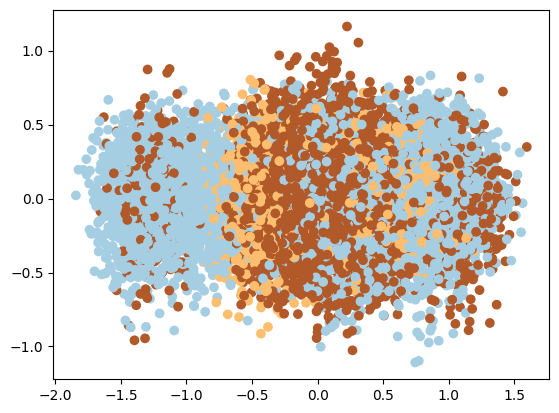

In [ ]:
# Applying BIRCH clustering algorithm
from sklearn.cluster import Birch
Cluster2 = Birch(threshold=0.75, n_clusters=3).fit(data)
## Plot the result
plt.scatter(pc.iloc[:,8], pc.iloc[:,17], c=Cluster2.labels_, cmap='Paired') # Parameters in this chart include BCT_Avg and Feed_Roll_Gap

BIRCH is one of the faster algorithms that was used to create clusters from the 1 Printing Gap dataset. An argument to use this algorithm is that it can execute and output clusters from the dataset without the need for a significant amount of memory or processing power. Clusters are created by measuring the distance between subclusters. A CF-tree is created to represent the hierarchy of subclusters within a cluster.

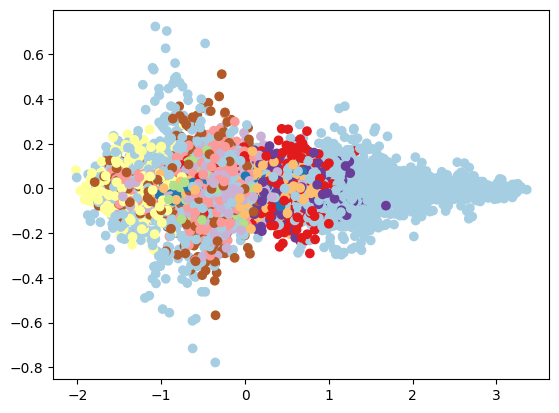

In [ ]:
from sklearn.cluster import OPTICS
Cluster3 = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05).fit(data)
## Plot the result
plt.scatter(pc.iloc[:,8], pc.iloc[:,24], c=Cluster3.labels_, cmap='Paired') # Parameters are BCT_Avg and Finished Product Height


OPTICS clustering algorithm applied. Although this OPTICS is similar to
DBSCAN, the notable difference between these algorithms is that OPTICS is more reliable when working with large datasets because it can keep cluster hierarchy for a varied neighborhood radius. This capability also means that OPTICS's runtime is longer than some of the other algorithms used to complete this assignment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

data = pd.read_csv('Data_with_1_Printing_Gap.csv')
relevant_data = data[['BCT_Avg', 'ECT_Avg']].dropna()

linked = linkage(relevant_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=relevant_data.index + 1,
           distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram of BCT_Avg and ECT_Avg")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


threshold = 10
clusters = fcluster(linked, threshold, criterion='distance')

# Add cluster labels to the original data
data['Cluster'] = np.nan
data.loc[relevant_data.index, 'Cluster'] = clusters

plt.figure(figsize=(10, 7))
scatter = plt.scatter(data['BCT_Avg'], data['Feed_Roll_Gap'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Hierarchical Relationship between BCT Avg and Feed Roll Gap')
plt.xlabel('BCT_Avg')
plt.ylabel('ECT_Avg')
plt.colorbar(scatter, label='Cluster Label')
plt.grid()
plt.show()
